In [1]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('C:/Users/omkar/Downloads/placement.csv')

In [7]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [11]:
df.shape

(100, 4)


# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [13]:
df = df.iloc[:,1:]

In [15]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [19]:
import matplotlib.pyplot as plt

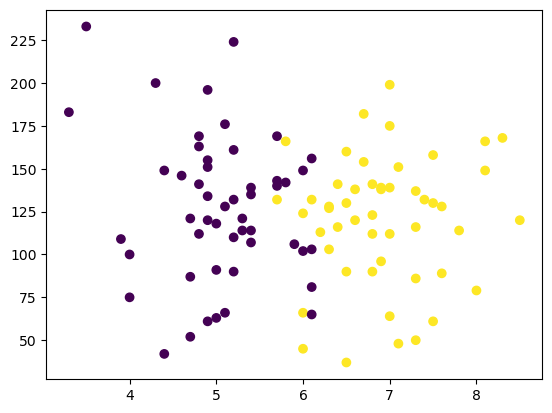

In [23]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [25]:
X = df.iloc[:,0:2]

In [33]:
y= df.iloc[:,-1]

In [41]:
X.shape

(100, 2)

In [43]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [51]:
y_test.shape

(10,)

In [53]:
from sklearn.preprocessing import StandardScaler

In [55]:
scalar = StandardScaler()

In [57]:
X_train = scalar.fit_transform(X_train)

In [59]:
X_test =scalar.fit_transform(X_test)

In [65]:
X_test

array([[-0.45066382,  0.8767852 ],
       [ 0.82043926, -0.22199932],
       [-1.25954759, -0.28927184],
       [ 0.24266513,  1.10102694],
       [ 0.70488443,  0.92163355],
       [-1.14399277,  1.41496538],
       [ 0.82043926, -1.41048055],
       [ 1.51376821, -1.16381463],
       [-1.60621207, -1.29835968],
       [ 0.35821996,  0.06951494]])

In [67]:
from sklearn.linear_model import LogisticRegression

In [71]:
clf = LogisticRegression()

In [73]:
# 4. Train the model
clf.fit(X_train, y_train)

LogisticRegression()

In [85]:
y_pred = clf.predict(X_test)

In [87]:
y_test

12    0
79    1
23    0
33    0
54    1
34    0
82    1
5     1
96    0
14    0
Name: placement, dtype: int64

In [81]:
from sklearn.metrics import accuracy_score

In [89]:
accuracy_score(y_pred,y_test)

0.8

In [101]:
# 5. Evaluate the model/model selection

from mlxtend.plotting import plot_decision_regions

<Axes: >

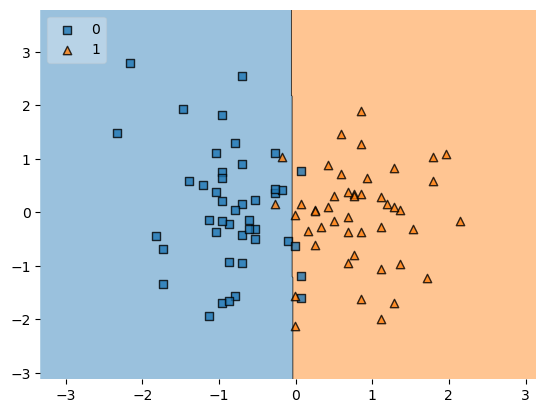

In [105]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [107]:
import pickle

In [111]:
pickle.dump(clf, open('model.pkl', 'wb'))

In [121]:
prediction = model.predict([[ 0, 71.]])
prediction

array([1], dtype=int64)